<a href="https://colab.research.google.com/github/Binarybug-debug/Dynamics-/blob/main/Measures_of_Central_Tendency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Measures of Central Tendency


## Common measures
1. **Mean**: The average of all data points. It's calculated as the sum of all values divided by the number of values.

2. **Median:** The middle value when all data points are sorted in order. If the dataset has an odd number of observations, the median is the middle value; if even, it is the average of the two middle values.

3. **Mode:** The value that appears most frequently in a dataset. There can be more than one mode if multiple values occur with the same highest frequency.

4. **Variance:**
Measures the spread of the values in the column from the mean. It indicates how much the values in the column differ from the mean value, calculated as the average of the squared differences from the mean.

5. **Standard Deviation:**
Measures the amount of variation or dispersion of the values in the column. It is the square root of the variance and provides a measure of spread in the same units as the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load  the statistical summary
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
df.sample(7)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2832,-117.30,34.12,34.0,1127.0,275.0,971.0,249.0,2.0583,64800.0
1723,-122.00,36.97,30.0,1029.0,242.0,753.0,249.0,3.1205,240500.0
234,-122.00,37.35,20.0,4304.0,851.0,2059.0,835.0,5.1674,333000.0
1525,-118.33,34.11,37.0,2330.0,434.0,846.0,457.0,8.2335,430200.0
334,-118.13,34.01,45.0,1179.0,268.0,736.0,252.0,2.7083,161800.0
498,-122.44,37.76,52.0,1968.0,472.0,784.0,430.0,3.3702,370000.0
1052,-118.62,34.06,25.0,3546.0,584.0,1530.0,601.0,7.4001,500001.0


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [4]:
# Check the tail
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0
2999,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0


In [5]:
# Check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [6]:
# Check for statistical summary
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [7]:
# Check the columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [8]:
# Check shape
df.shape

(3000, 9)

In [15]:
# Measures of central tendency
# df.mean()
df.median()
#df.mode().iloc[:]



,0
longitude,-118.48500
latitude,34.27000
housing_median_age,29.00000
total_rooms,2106.00000
total_bedrooms,437.00000
population,1155.00000
households,409.50000
median_income,3.48715
median_house_value,177650.00000


In [11]:
df.shape #attribue

(3000, 9)

In [ ]:
# Perform variance and standard deviation

# std_dev = ...


# variance = ...


## Skewness and Kurtosis



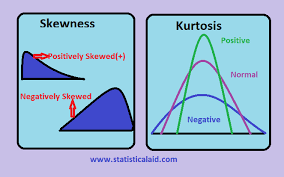

**Kurtosis** measures the "tailedness" of the data distribution, or how heavy or light the tails are compared to a normal distribution.

- *Leptokurtic (Positive Kurtosis):* Data with heavy tails, indicating outliers. Kurtosis > 3.
- *Platykurtic (Negative Kurtosis):* Data with light tails, indicating fewer outliers. Kurtosis < 3.
- *Mesokurtic (Normal Kurtosis):* Data with kurtosis approximately equal to 3, similar to a normal distribution.

**Skewness measures** the asymmetry of the distribution of data. It indicates whether the data points are skewed to the left or right of the mean.

- *Positive Skewness (Right-skewed):* The tail on the right side is longer or fatter. The mean and median will be greater than the mode.
- *Negative Skewness (Left-skewed):* The tail on the left side is longer or fatter. The mean and median will be less than the mode.
- *Zero Skewness:* The data is perfectly symmetrical around the mean.


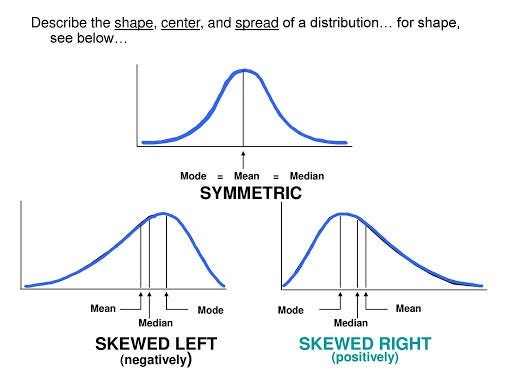   

In [ ]:
 # df.median_house_value.skew()
# df.housing_median_age.skew()
df.median_income.skew()

1.6985117348319874

## Covariance, Correlation & R2

**Covariance** is a measure of how two random variables change together. Specifically, it quantifies the directional relationship between the variables. If the variables tend to increase or decrease together

In [ ]:
# Calculate the covariance matrix for the DataFrame
cov_matrix = round(df[['median_income', 'median_house_value', 'housing_median_age']].cov(),2)


cov_matrix

,median_income,median_house_value,housing_median_age
median_income,3.44,1.411192e+05,-3.36
median_house_value,141119.19,1.279606e+10,129825.03
housing_median_age,-3.36,1.298250e+05,157.64


In [ ]:
# Extracting specific covariances
cov_income_house_value = cov_matrix.loc['median_income', 'median_house_value']
cov_income_age = cov_matrix.loc['median_income', 'housing_median_age']

print(f"\nCovariance between Median Income and Median House Value: {cov_income_house_value}")
print(f"Covariance between Median Income and Housing Median Age: {cov_income_age}")


Covariance between Median Income and Median House Value: 141119.19
Covariance between Median Income and Housing Median Age: -3.36


**Correlation** is a standardized version of covariance and is easier to interpret because it ranges between -1 and 1.

**NB: Read on types of correlation**

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


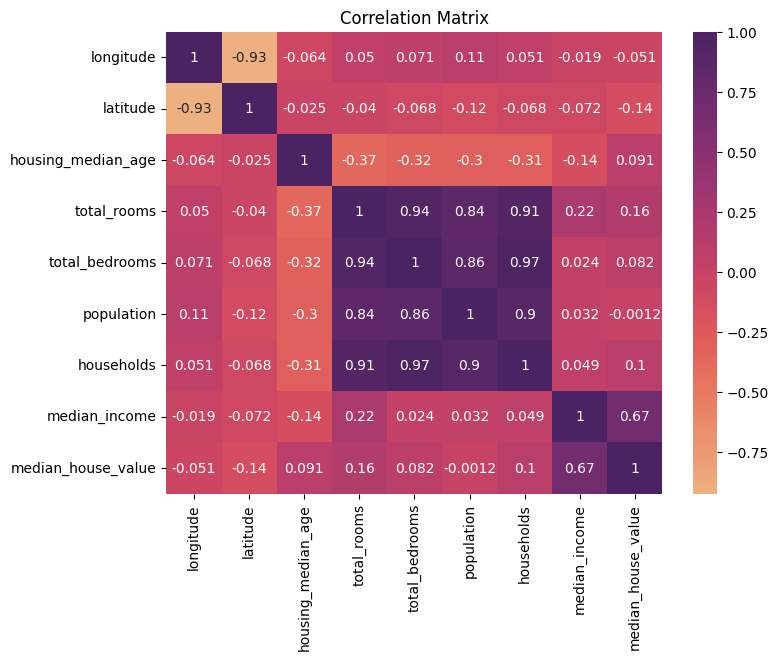

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='flare')#, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Calculate correlation of 'median_house_value' with all other columns
corr_house_value = df.corr()['median_house_value'].sort_values(ascending = False)[1:]

print("Correlation of median house value with other columns")
print(corr_house_value)

# Create and plot the corr_house_value


Correlation of median house value with other columns
median_income         0.672695
total_rooms           0.160427
households            0.100176
housing_median_age    0.091409
total_bedrooms        0.082279
population           -0.001192
longitude            -0.050662
latitude             -0.138428
Name: median_house_value, dtype: float64


The **R-squared/goodness of fit/coefficient of determination**, measures the proportion of variance in the dependent variable that is predictable from the independent variables.
- 𝑅2 =1: The model perfectly explains the variance in the dependent variable.

- 𝑅=0: The model does not explain any of the variance in the dependent variable.
- 𝑅 <0: The model performs worse than a horizontal line representing the mean of the dependent variable.

It's commonly used in regression analysis to evaluate the goodness of fit of a model.

## Quantiles

Quantiles are values that divide a dataset into equal-sized intervals. They provide a way to understand the distribution of the data.


*   **Quartiles** are specific types of quantiles that divide the dataset into four equal parts.
*   The **range** of a dataset is the difference between the maximum and minimum values. It gives a measure of the spread of the data.
*   The **Interquartile Range (IQR)** is the difference between the third quartile (Q3) and the first quartile (Q1). It measures the spread of the middle 50% of the data.
-  **Deciles** divide the dataset into ten equal parts.
-  **Percentiles** divide the dataset into 100 equal parts.



In [ ]:
# Get quantile
data = [12,33,4,5,66,77,33,67,85,33,67,33,6,99,239,10,28,18,28,28]
percentiles = np.quantile(data, 0.25)
print(percentiles)

16.5


In [ ]:
# Which function from NumPy will calculate the 25th percentile of an array?

## Visual Analysis

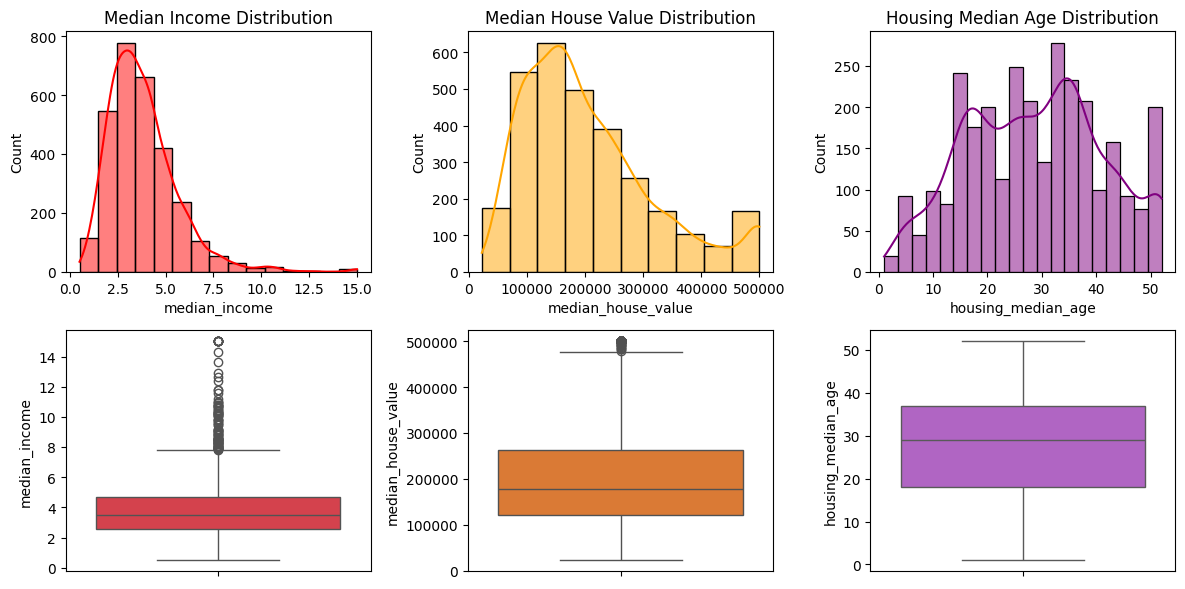

In [ ]:
# Exploring central tendency using boxplots and histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.histplot(df['median_income'], kde=True, color = 'red', bins = 15)
plt.title('Median Income Distribution')

plt.subplot(2, 3, 2)
sns.histplot(df['median_house_value'], kde=True, color = 'orange', bins = 10)
plt.title('Median House Value Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['housing_median_age'], kde=True, color = 'purple',bins = 20)
plt.title('Housing Median Age Distribution')

plt.subplot(2, 3, 4)
sns.boxplot(df['median_income'], color =  '#ED2939')

plt.subplot(2, 3, 5)
sns.boxplot(df['median_house_value'],color = '#F5761A')

plt.subplot(2, 3, 6)
sns.boxplot(df['housing_median_age'] ,color = '#BA55D3')

plt.tight_layout()
plt.show()

Understanding these statistical concepts allows for better analysis and interpretation of data. Central tendency provides insights into the *average* or *center* of the data, correlation shows relationships between variables, and skewness and kurtosis offer insights into the distribution's shape and outliers. Together, these measures form the foundation of descriptive statistics and are crucial in data analysis and interpretation.

# Quiz

In [ ]:
# 1. What is the mean of the following dataset: [5, 8, 12, 15, 20]?
df = pd.DataFrame([5,8,12,20])

x= [5,8,12,20]
sum(x)/len(x)
# A) 10
# B) 12
# C) 15
# D) 20

11.25

In [ ]:
# 2. If the standard deviation of a dataset is 0, what does this imply?
import random
np.random.normal(9,0,50) #using a mean of 9


array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

In [ ]:
# 3. Which correlation coefficient indicates the strongest relationship between two variables?

# A) 0.8
# B) -0.9
# C) 0.2
# D) -0.3

In [ ]:
# 4. Complete -> A dataset with a positive skewness indicates ...

In [ ]:
# 5. In regression analysis, what does an 𝑅2 value of 0.85 signify?

In [ ]:
# 6. If Q1 = 25 and Q3 = 75, what is the Interquartile Range (IQR)?

In [ ]:
# 7. In a boxplot, the length of the box represents ...

In [ ]:
# 8. What is the 0.75 quantile (3rd quartile) of the dataset [3, 7, 8, 12, 14, 18]?

In [ ]:
# 9. If a data point has a z-score of 2, what does it indicate?

In [ ]:
# 10. In a normally distributed dataset,
# what is true about the 50th percentile compared to the mean?

In [ ]:
# 11. You have an array of 1,000 randomly generated numbers. After randomizing the array, you want to find the value at the 57th percentile.
# Which Python code snippet will correctly compute this percentile?
num_array=np.random.rand(1000)
percentile_value=np.percentile(num_array,57)
round(percentile_value,3)

0.565